<a href="https://colab.research.google.com/github/anuj-l22/DC_Project/blob/main/DC_initial_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

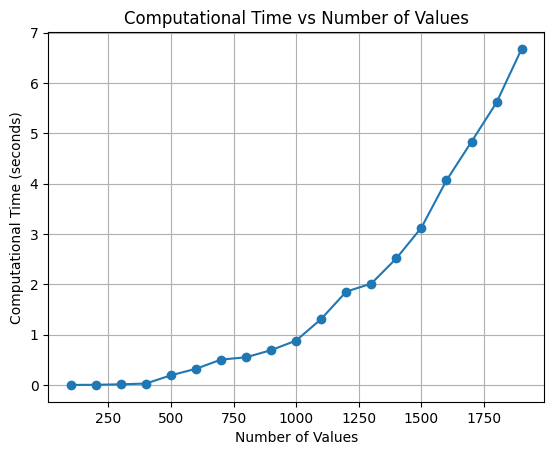

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

def rotate_vector(vec, direction):
    if direction == 'left':
        return np.roll(vec, -1)
    elif direction == 'right':
        return np.roll(vec, 1)
    else:
        raise ValueError("Direction must be 'left' or 'right'")

def vector_operations(vec1, vec2):
    # Pad the shorter vector with zeros to match the length of the longer vector
    if len(vec1) < len(vec2):
        vec1 = np.pad(vec1, (0, len(vec2) - len(vec1)), 'constant')
    elif len(vec2) < len(vec1):
        vec2 = np.pad(vec2, (0, len(vec1) - len(vec2)), 'constant')

    n = max(len(vec1), len(vec2))
    result_vector = vec1 - vec2

    for _ in range(1, n // 2):
        vec1 = rotate_vector(vec1, 'left')
        result_vector = np.append(result_vector, vec1 - vec2)

    for _ in range(n // 2, n ):
        vec2 = rotate_vector(vec2, 'right')
        result_vector = np.append(result_vector, vec1 - vec2)
    # print(result_vector.shape)
    return result_vector

# Define the path to the CSV file
csv_file = "DC.csv"

# Define the range of values for testing
values_range = range(100, 2000, 100)

# Record the computational times
times = []
for n in values_range:
    df = pd.read_csv(csv_file, nrows=n)
    vec1 = df.iloc[:, 0].values
    vec2 = df.iloc[:, 1].values

    start_time = time.time()
    result_vector = vector_operations(vec1, vec2)
    end_time = time.time()

    times.append(end_time - start_time)

# Plot the graph
plt.plot(values_range, times, marker='o')
plt.xlabel('Number of Values')
plt.ylabel('Computational Time (seconds)')
plt.title('Computational Time vs Number of Values')
plt.grid(True)
plt.show()


In [ ]:
print(result_vector.shape)

(1440000,)


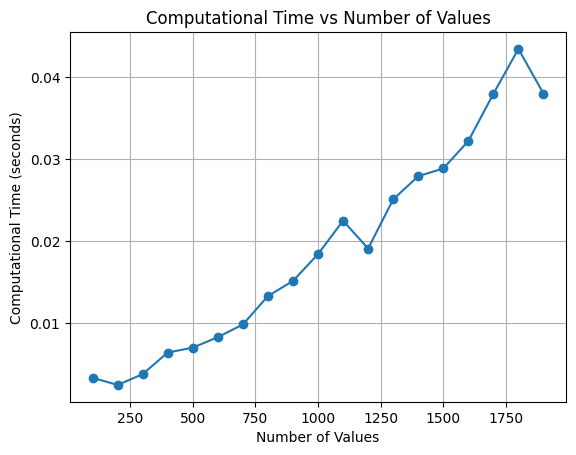

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

def rotate_and_operate_chunked(vec1, vec2, chunk_size=10000):
    n = len(vec1)
    result_vector = np.empty(n * n, dtype='float32')  # Use float32 to reduce memory usage

    for start in range(0, n, chunk_size):
        end = min(start + chunk_size, n)
        chunk_length = end - start
        temp_result = np.empty((chunk_length, n), dtype='float32')

        for i in range(chunk_length):
            rotated_vec1 = np.roll(vec1, start + i)
            temp_result[i, :] = rotated_vec1 - vec2

        result_vector[start*n:(start + chunk_length)*n] = temp_result.flatten()

    return result_vector

csv_file = "DC.csv"
values_range = range(100, 2000, 100)

times = []
results = []

for n in values_range:
    df = pd.read_csv(csv_file, usecols=[0, 1], nrows=n)
    vec1 = df.iloc[:, 0].values.astype('float32')
    vec2 = df.iloc[:, 1].values.astype('float32')

    start_time = time.time()
    result_vector = rotate_and_operate_chunked(vec1, vec2)
    end_time = time.time()

    times.append(end_time - start_time)
    results.append(result_vector[:10])  # Display only first 10 elements for verification

# Plot the graph
plt.plot(values_range, times, marker='o')
plt.xlabel('Number of Values')
plt.ylabel('Computational Time (seconds)')
plt.title('Computational Time vs Number of Values')
plt.grid(True)
plt.show()


In [ ]:
print(result_vector.shape)

(10000,)
